<a href="https://colab.research.google.com/github/Cyfloat/ml/blob/main/HDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Handwritten Digit Recognition

Importing the Libraries

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix


Loading the Dataset into training and test set

In [54]:
(X_train, y_train), (X_test, y_test)=keras.datasets.mnist.load_data()

Looking at the training samples

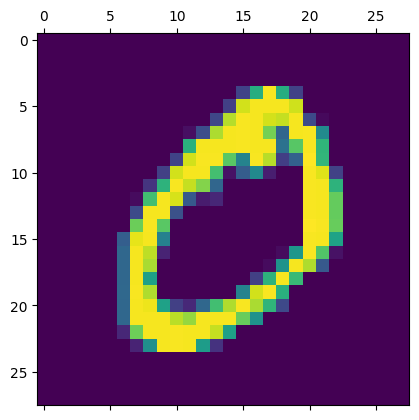

In [56]:
plt.matshow(X_train[1])

In [57]:
y_train[1]

0

In [58]:
X_train.shape

(60000, 28, 28)

Scaling the features

In [59]:
X_train=X_train/255
X_test= X_test/255

Reshaping the features

In [60]:
X_train_flat= X_train.reshape(len(X_train),28*28)
X_test_flat= X_test.reshape(len(X_test),28*28)

Specifying the Model

In [62]:
model=Sequential([
    Dense(25,activation='relu'),
    Dense(15,activation='relu'),
    Dense(10,activation='softmax')
])

Compiling the Model

In [69]:

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

Training the Model

In [70]:
model.fit(X_train_flat, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3992 - accuracy: 0.8818
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1982 - accuracy: 0.9422
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1629 - accuracy: 0.9515
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1408 - accuracy: 0.9579
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1268 - accuracy: 0.9625
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1132 - accuracy: 0.9656
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1034 - accuracy: 0.9682
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0970 - accuracy: 0.9705
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0898 - accuracy: 0.9722
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.084

Evaluating the Model on test set

In [71]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1204 - accuracy: 0.9643


[0.12040495872497559, 0.9642999768257141]

Making Predictions

In [72]:

y_predicted=model.predict(X_test_flat)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.6891161e-07, 1.0126507e-08, 3.3934874e-04, 4.6455523e-04,
       8.6536098e-11, 1.2465484e-05, 3.1832709e-12, 9.9914420e-01,
       1.9039289e-05, 2.0138994e-05], dtype=float32)

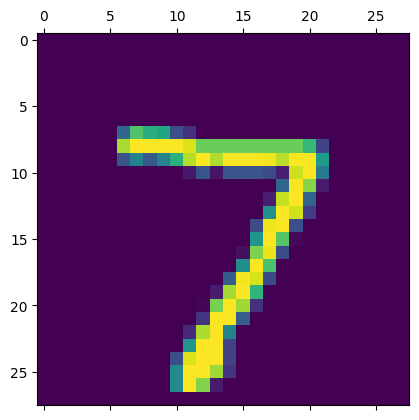

In [73]:

plt.matshow(X_test[0])

In [74]:

np.argmax(y_predicted[0])

7

In [75]:

y_predicted_labels=[np.argmax(i) for i in y_predicted]

Forming Confusion Matrix

In [76]:
cm = confusion_matrix(y_test, y_predicted_labels)
print(cm)

[[ 966    0    2    2    2    2    3    1    2    0]
 [   0 1118    4    1    1    0    2    1    8    0]
 [   3    2  999    5    3    2    3    7    6    2]
 [   0    0    9  976    0    8    0    8    5    4]
 [   0    1    7    0  942    1    5    3    3   20]
 [   3    2    5   16    2  850    6    1    5    2]
 [  11    3    6    1    9    9  914    0    5    0]
 [   2    4   17    3    2    0    0  992    0    8]
 [   6    2    6    9    4    7    6    6  924    4]
 [   3    7    1    6   12    6    0    9    3  962]]


Text(95.72222222222221, 0.5, 'Truth')

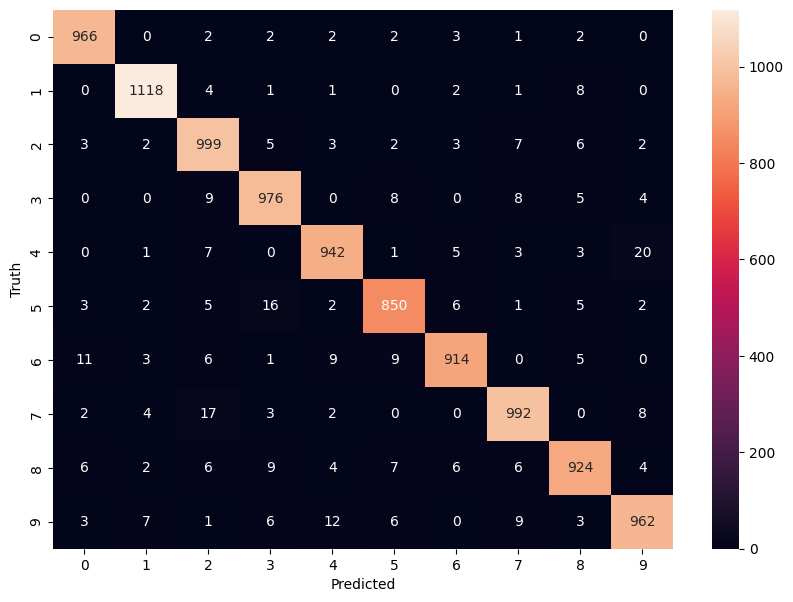

In [77]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Calculating Accuracy

In [78]:

accuracy=accuracy_score(y_test, y_predicted_labels)
print(f"Test Accuracy: {accuracy*100}%")

Test Accuracy: 96.43%
